In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 서울

In [52]:
city = '서울'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24


## 결측치 확인

In [53]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

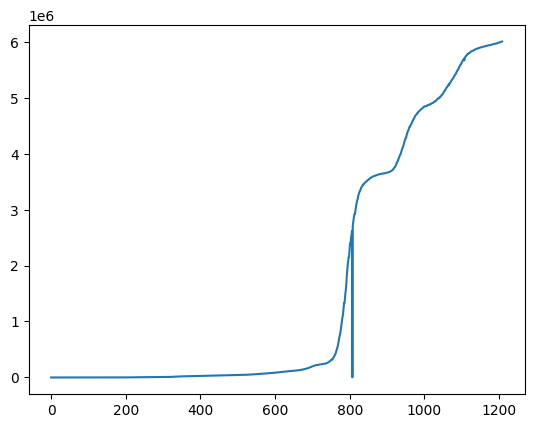

In [54]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [55]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [56]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [57]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [58]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [59]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 확인

In [60]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


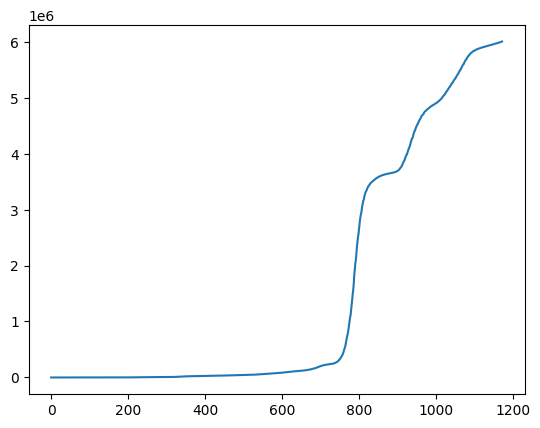

In [61]:
plt.plot(df_final['defCnt'])

In [62]:
df_final[df_final['qurRate'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
626,669,105549,서울,Seoul,834,90316,14584,830,4,32.4,2021-10-07
733,2135,249065,서울,Seoul,1591,202559,0,1535,56,2576.0,2022-01-22
836,4643,3512421,서울,Seoul,6645,0,0,6645,0,36329.0,2022-05-05
838,4676,3522657,서울,Seoul,6641,0,0,6639,2,36435.0,2022-05-07
880,4864,3646432,서울,Seoul,1245,0,0,1245,0,37715.0,2022-06-18
908,4916,3752951,서울,Seoul,9457,0,0,9449,8,38816.0,2022-07-16
950,5191,4505836,서울,Seoul,14599,0,0,14578,21,46603.0,2022-08-27
965,5352,4690417,서울,Seoul,4807,0,0,4800,7,48513.0,2022-09-11
1098,6225,5834396,서울,Seoul,2315,0,0,2297,18,61354.0,2023-01-22


## 수정 후 데이터 저장

In [63]:
cleaned_df = df.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

In [64]:
df = df_final

# 부산

In [2]:
city = '부산'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-20
1,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-21
2,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-22
3,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-23
4,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [3]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

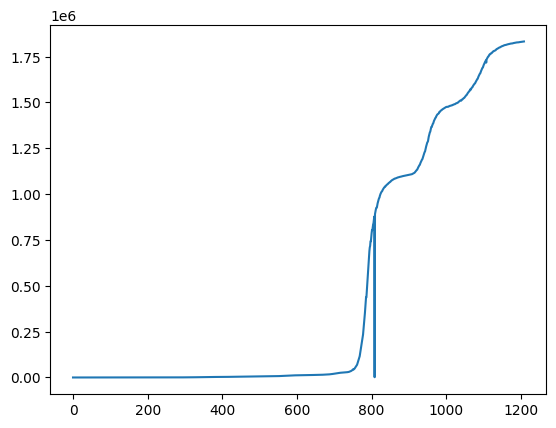

In [6]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [11]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,58,2006,부산,Busan,37,1446,502,34,3,58.80,2021-01-04
351,58,2007,부산,Busan,37,1447,502,34,3,58.82,2021-01-04
654,165,14074,부산,Busan,80,13413,496,77,3,415.00,2021-11-03
655,164,14074,부산,Busan,80,13375,455,77,3,415.00,2021-11-03
751,364,45718,부산,Busan,1927,45718,0,1916,11,1365.00,2022-02-07
752,364,43791,부산,Busan,1927,45718,0,1916,11,1307.00,2022-02-07
753,364,45718,부산,Busan,1927,31126,0,1916,11,1365.00,2022-02-07
785,691,436820,부산,Busan,22920,68841,0,22917,3,13038.00,2022-03-11
786,651,436820,부산,Busan,22920,68472,0,22917,3,13038.00,2022-03-11
797,1158,742457,부산,Busan,24707,282459,0,24707,0,22160.00,2022-03-22


## 완전히 같은 데이터 추출

In [17]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,1646,926469,부산,Busan,4080,0,0,4080,0,27653.0,2022-04-04
814,1646,926469,부산,Busan,4080,0,0,4080,0,27653.0,2022-04-04
862,2118,1084656,부산,Busan,1094,0,0,1094,0,32374.0,2022-05-21
863,2118,1084656,부산,Busan,1094,0,0,1094,0,32374.0,2022-05-21
893,2170,1101815,부산,Busan,149,0,0,148,1,32886.0,2022-06-20
894,2170,1101815,부산,Busan,149,0,0,148,1,32886.0,2022-06-20
960,2331,1366157,부산,Busan,7164,0,0,7163,1,40776.0,2022-08-25
961,2331,1366157,부산,Busan,7164,0,0,7163,1,40776.0,2022-08-25
981,2406,1446689,부산,Busan,4982,0,0,4975,7,43180.0,2022-09-14
982,2406,1446689,부산,Busan,4982,0,0,4975,7,43180.0,2022-09-14


In [38]:
df2 = df.drop_duplicates().reset_index(drop = True)    # 완전히 같은 데이터 제거
print('모든 행이 동일한 데이터 개수 : ' + str(df2.duplicated(keep = False).sum()) + '개')
df2[df2.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 0개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


## 수정해야하는 데이터만 추출

In [42]:
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)][:]

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,58,2006,부산,Busan,37,1446,502,34,3,58.80,2021-01-04
351,58,2007,부산,Busan,37,1447,502,34,3,58.82,2021-01-04
654,165,14074,부산,Busan,80,13413,496,77,3,415.00,2021-11-03
655,164,14074,부산,Busan,80,13375,455,77,3,415.00,2021-11-03
751,364,45718,부산,Busan,1927,45718,0,1916,11,1365.00,2022-02-07
752,364,43791,부산,Busan,1927,45718,0,1916,11,1307.00,2022-02-07
753,364,45718,부산,Busan,1927,31126,0,1916,11,1365.00,2022-02-07
785,691,436820,부산,Busan,22920,68841,0,22917,3,13038.00,2022-03-11
786,651,436820,부산,Busan,22920,68472,0,22917,3,13038.00,2022-03-11
797,1158,742457,부산,Busan,24707,282459,0,24707,0,22160.00,2022-03-22


## 데이터 수정

In [54]:
dup_index = list(df2[df2.duplicated(['stdDay'], keep = False)].index)
repair_index = []
for i in range(len(dup_index)):
    if dup_index[i] - dup_index[i-1] == 1:
        pass
    else:
        repair_index.append(dup_index[i])

repair_index

[350, 654, 751, 785, 797, 801, 807, 835, 1024, 1049, 1091, 1153, 1168]

In [78]:
n = 0
print('n : 0 ~ ' + str(len(repair_index)-1))
df2.iloc[repair_index[n]-4:repair_index[n]+6]

n : 0 ~ 12


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1164,2811,1825932,부산,Busan,437,0,0,437,0,55034.0,2023-03-16
1165,2812,1826301,부산,Busan,369,0,0,369,0,55045.0,2023-03-17
1166,2812,1826629,부산,Busan,354,0,0,354,0,55055.0,2023-03-18
1167,0,1826959,부산,Busan,330,0,0,330,0,55065.0,2023-03-19
1168,2814,1826959,부산,Busan,330,0,0,330,0,55065.0,2023-03-20
1169,2814,1827041,부산,Busan,82,0,0,82,0,55068.0,2023-03-20
1170,2815,1827451,부산,Busan,410,0,0,409,1,55080.0,2023-03-21
1171,2815,1827878,부산,Busan,427,0,0,426,1,55093.0,2023-03-22
1172,2816,1828301,부산,Busan,423,0,0,422,1,55106.0,2023-03-23
1173,2816,1828614,부산,Busan,313,0,0,313,0,55115.0,2023-03-24


In [79]:
del_index = [351, 655, 751, 752, 786, 798, 802, 808, 836, 1025, 1050, 1091, 1154, 1168]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-20
1,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-21
2,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-22
3,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-23
4,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-24
5,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-25
6,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-26
7,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-27
8,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-28
9,0,0,부산,Busan,0,0,0,0,0,0.0,2020-01-29


## 최종 확인

### stdDay가 같은 데이터

In [1]:
print('stdDay가 동일한 데이터 개수 : ' + str(df_final.duplicated(['stdDay'], keep = False).sum()) + '개')
df_final[df_final.duplicated(['stdDay'], keep = False)].head(10)

NameError: name 'df_final' is not defined

### 누적 확진자 수가 감소하는지 check

In [80]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


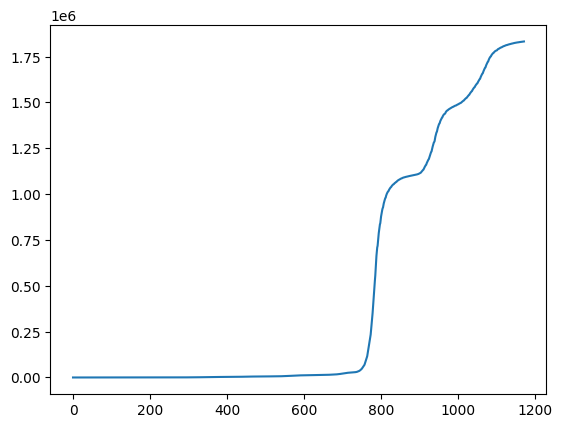

In [81]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [82]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 대구

In [83]:
city = '대구'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-20
1,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-21
2,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-22
3,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-23
4,0,0,대구,Daegu,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [84]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

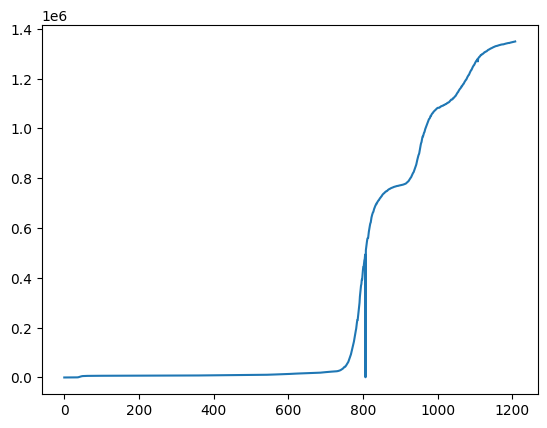

In [85]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [87]:
print('stdDay가 동일한 데이터 개수 : ' + str(df.duplicated(['stdDay'], keep = False).sum()) + '개')
df[df.duplicated(['stdDay'], keep = False)].head(10)

stdDay가 동일한 데이터 개수 : 68개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,203,7924,대구,Daegu,29,7357,364,29,0,325.22,2021-01-04
351,203,7924,대구,Daegu,29,7359,362,29,0,325.22,2021-01-04
654,265,17307,대구,Daegu,66,16297,679,66,0,716.00,2021-11-03
655,268,17307,대구,Daegu,66,16334,705,66,0,716.00,2021-11-03
751,399,41756,대구,Daegu,1971,43726,0,1967,4,1750.00,2022-02-07
752,399,43726,대구,Daegu,1971,30877,0,1967,4,1833.00,2022-02-07
753,399,43726,대구,Daegu,1971,43726,0,1967,4,1833.00,2022-02-07
785,587,230261,대구,Daegu,10307,136100,0,10307,0,9653.00,2022-03-11
786,607,230261,대구,Daegu,10307,151483,0,10307,0,9653.00,2022-03-11
797,783,392298,대구,Daegu,17360,259941,0,0,17360,16446.00,2022-03-22


## 완전히 같은 데이터 추출

In [80]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [81]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [82]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [83]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [84]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


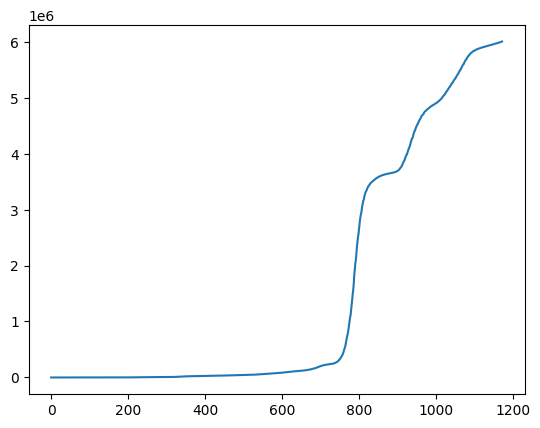

In [85]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [86]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 인천

In [242]:
city = '인천'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,1,인천,Incheon,0,0,1,0,1,0.0,2020-01-20
1,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-21
2,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-22
3,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-23
4,0,1,인천,Incheon,0,0,1,0,0,0.0,2020-01-24


## 결측치 확인

In [88]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

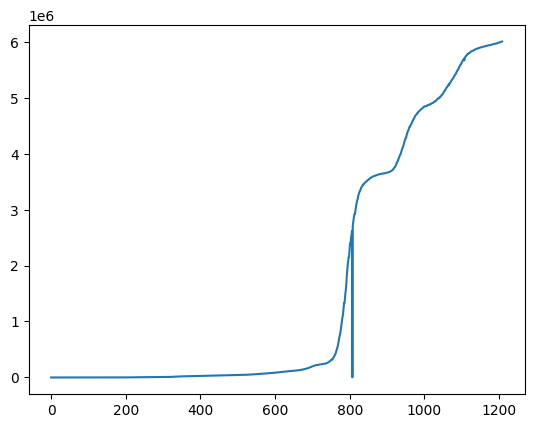

In [89]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [90]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [91]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [92]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [93]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [94]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [95]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


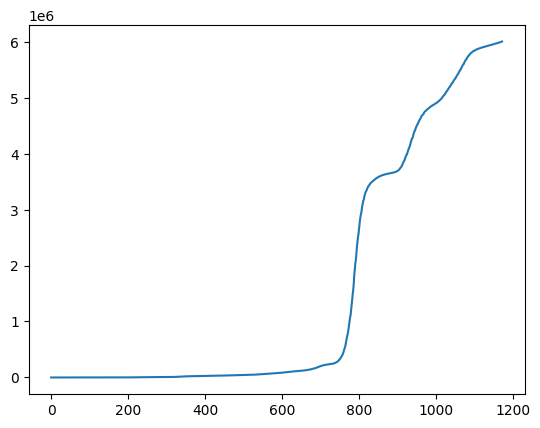

In [96]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [97]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 광주

In [243]:
city = '광주'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-20
1,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-21
2,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-22
3,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-23
4,0,0,광주,Gwangju,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [99]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

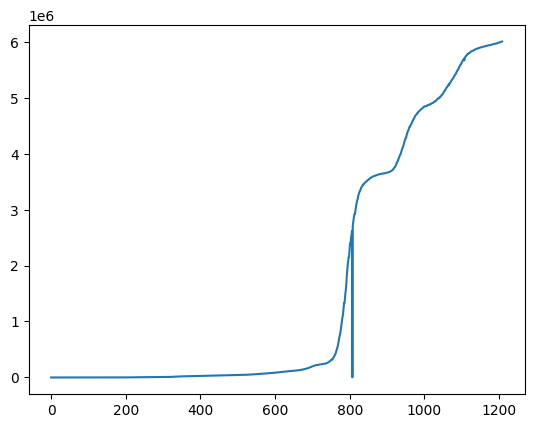

In [100]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [101]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [102]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [103]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [104]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [105]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [106]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


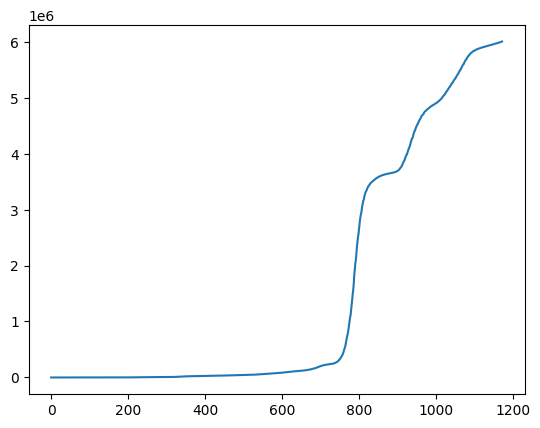

In [107]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [108]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 대전

In [244]:
city = '대전'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-20
1,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-21
2,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-22
3,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-23
4,0,0,대전,Daejeon,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [110]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

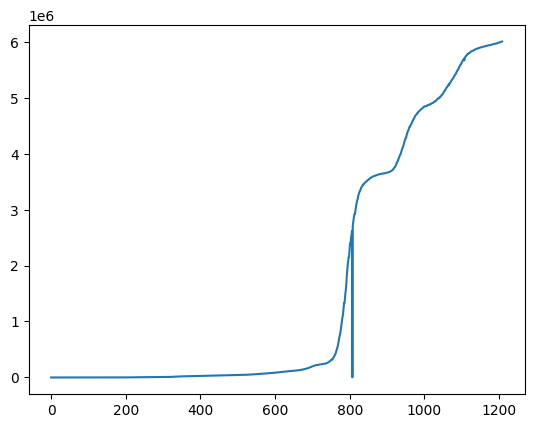

In [111]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [112]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [113]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [114]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [115]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [116]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [117]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


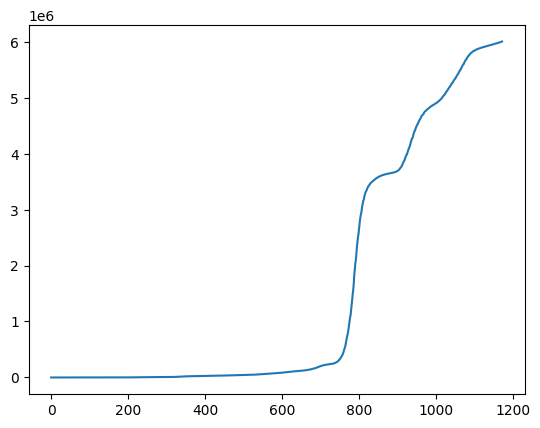

In [118]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [119]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 울산

In [245]:
city = '울산'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-20
1,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-21
2,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-22
3,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-23
4,0,0,울산,Ulsan,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [121]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

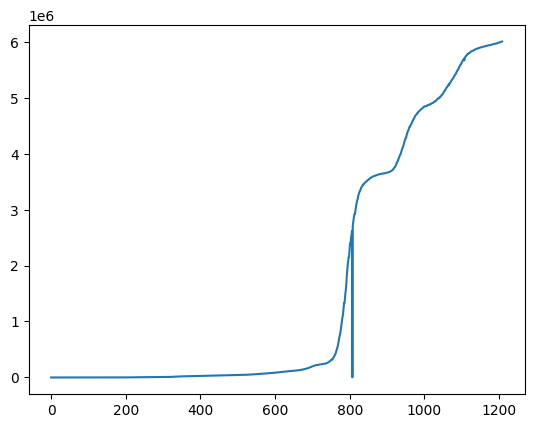

In [122]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [123]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [124]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [125]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [126]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [127]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [128]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


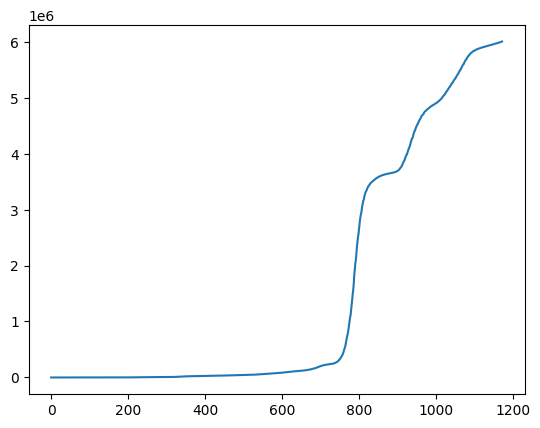

In [129]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [130]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 세종

In [246]:
city = '세종'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-20
1,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-21
2,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-22
3,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-23
4,0,0.0,세종,Sejong,0.0,0,0.0,0,0,0.0,2020-01-24


## 결측치 확인

In [132]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

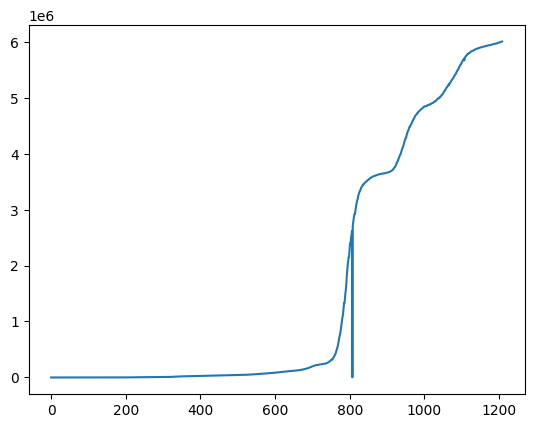

In [133]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [134]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [135]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [136]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [137]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [138]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [139]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


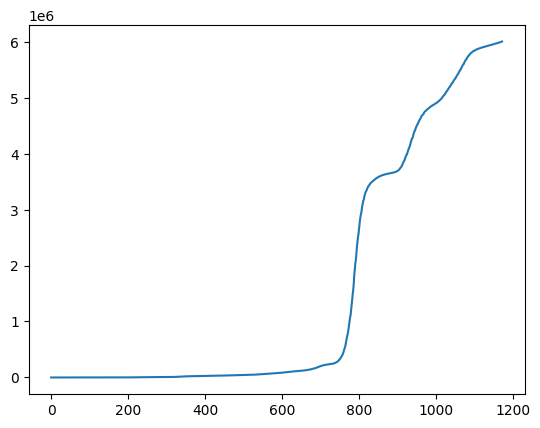

In [140]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [141]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 경기

In [247]:
city = '경기'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-20
1,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-21
2,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-22
3,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-23
4,0,0,경기,Gyeonggi-do,0,0,0,0,0,0.00,2020-01-24


## 결측치 확인

In [143]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

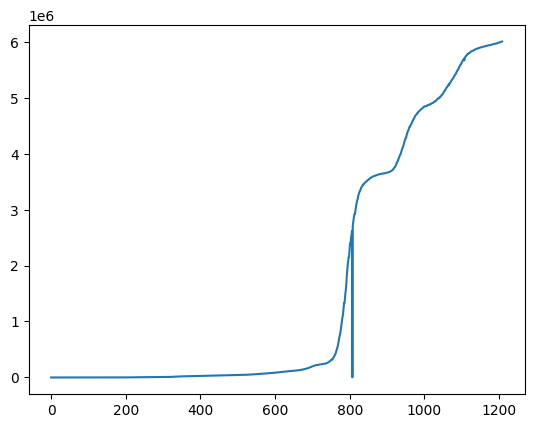

In [144]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [145]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [146]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [147]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [148]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [149]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [150]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


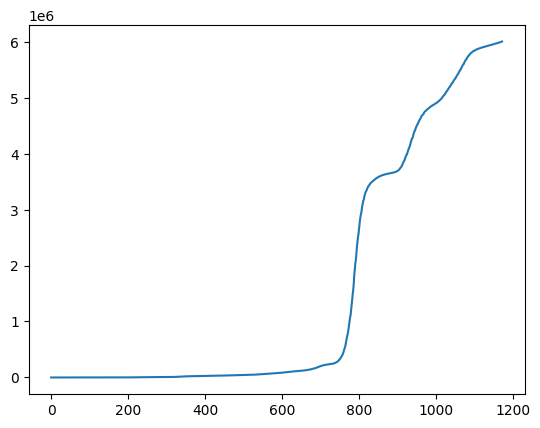

In [151]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [152]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 강원

In [248]:
city = '강원'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,강원,Gangwon-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [154]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

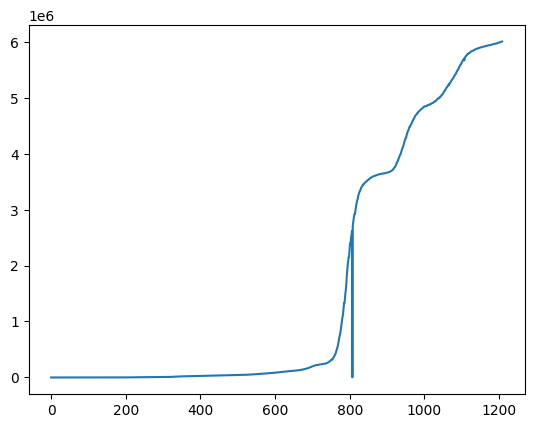

In [155]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [156]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [157]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [158]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [159]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [160]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [161]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


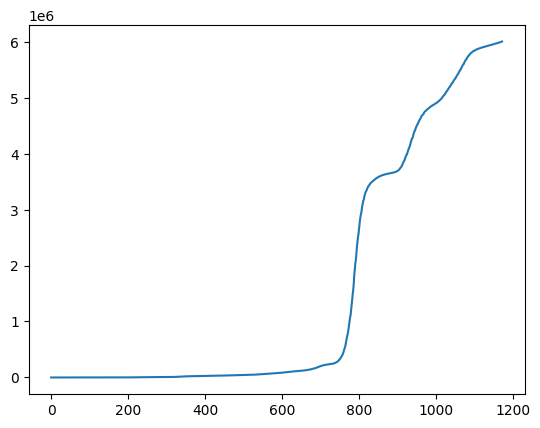

In [162]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [163]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 충북

In [249]:
city = '충북'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,충북,Chungcheongbuk-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [165]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

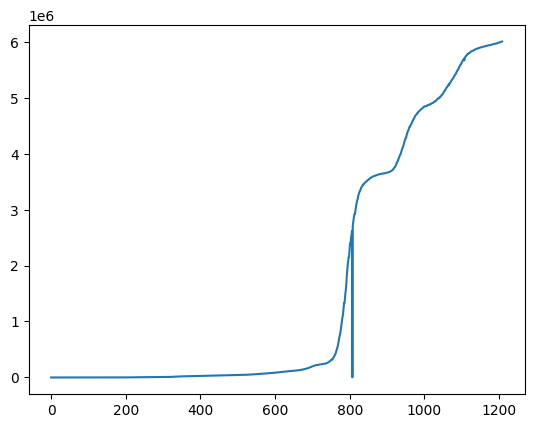

In [166]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [167]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [168]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [169]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [170]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [171]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [172]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


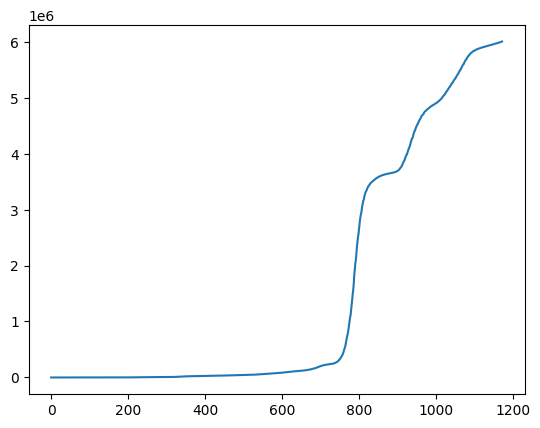

In [173]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [174]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 충남

In [250]:
city = '충남'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,충남,Chungcheongnam-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [176]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

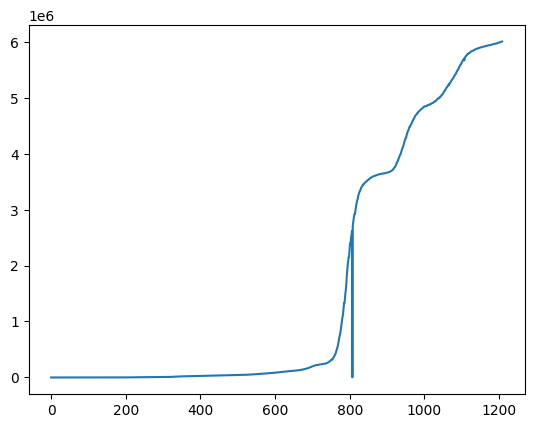

In [177]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [178]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [179]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [180]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [181]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [182]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [183]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


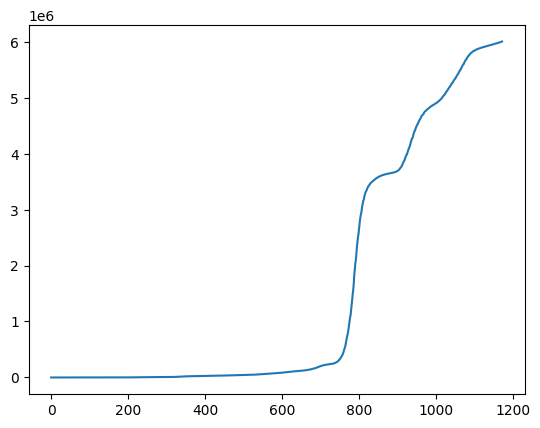

In [184]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [185]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 전북

In [251]:
city = '전북'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,전북,Jeollabuk-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [187]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

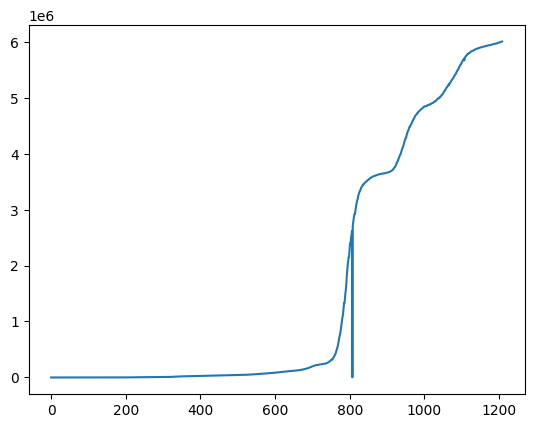

In [188]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [189]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [190]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [191]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [192]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [193]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [194]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


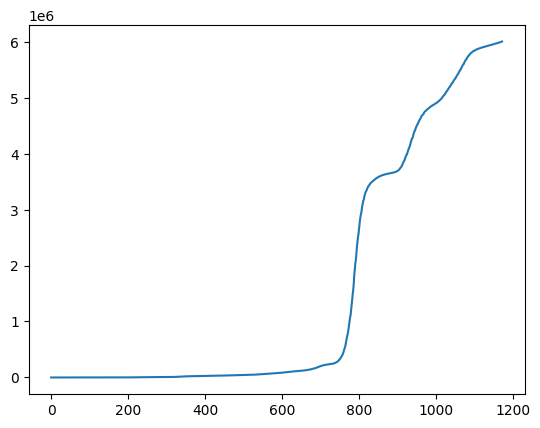

In [195]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [196]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 전남

In [252]:
city = '전남'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,전남,Jeollanam-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [198]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

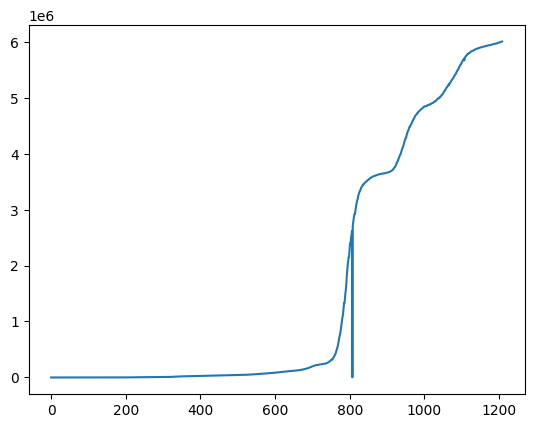

In [199]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [200]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [201]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [202]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [203]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [204]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [205]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


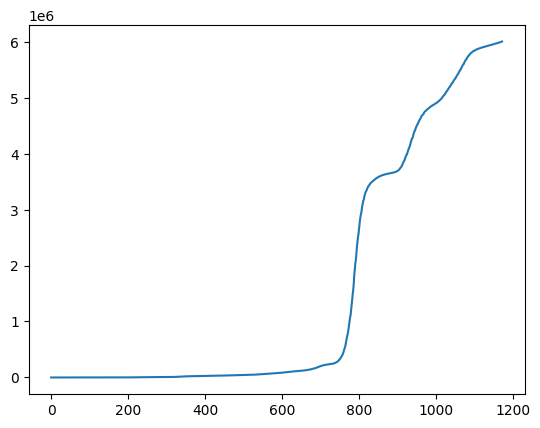

In [206]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [207]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 경북

In [253]:
city = '경북'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,경북,Gyeongsangbuk-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [209]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

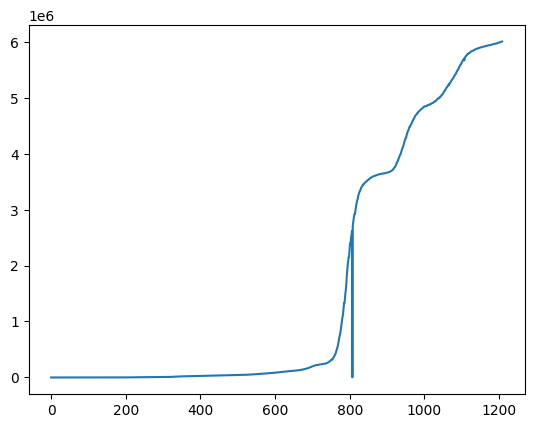

In [210]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [211]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [212]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [213]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [214]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [215]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [216]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


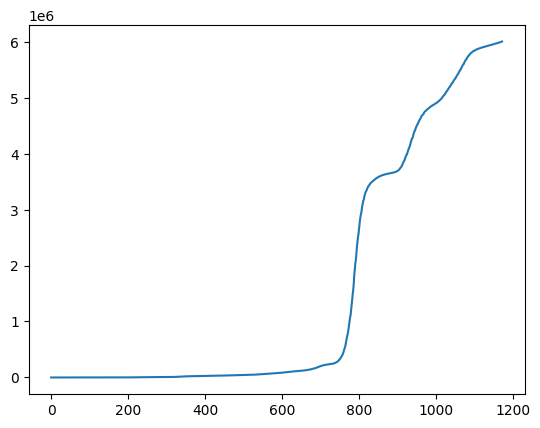

In [217]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [218]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 경남

In [254]:
city = '경남'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-20
1,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-21
2,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-22
3,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-23
4,0,0,경남,Gyeongsangnam-do,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [220]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

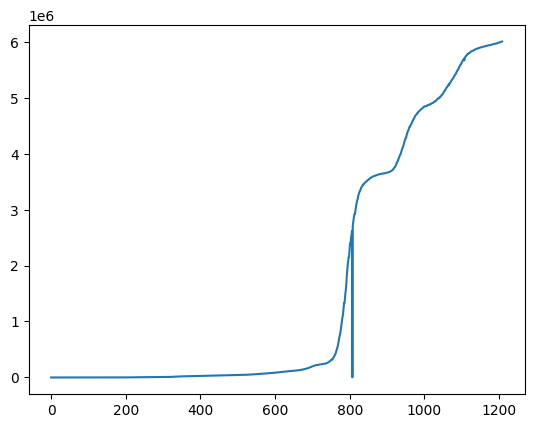

In [221]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [222]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [223]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [224]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [225]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [226]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [227]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


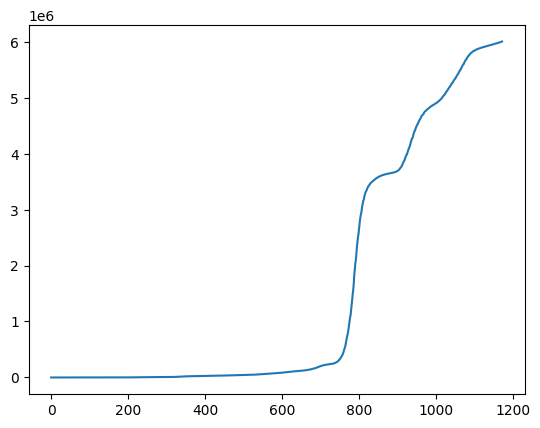

In [228]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [229]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')

# 제주

In [255]:
city = '제주'
# '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', 
# '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'


df = pd.read_csv(f'Data/Rawdata/{city}_Raw.csv', encoding = 'cp949')
df.head()

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-20
1,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-21
2,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-22
3,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-23
4,0,0,제주,Jeju,0,0,0,0,0,0.0,2020-01-24


## 결측치 확인

In [231]:
df.isnull().sum()

deathCnt        0
defCnt          0
gubun           0
gubunEn         0
incDec          0
isolClearCnt    0
isolIngCnt      0
localOccCnt     0
overFlowCnt     0
qurRate         0
stdDay          0
dtype: int64

## 이상치 확인

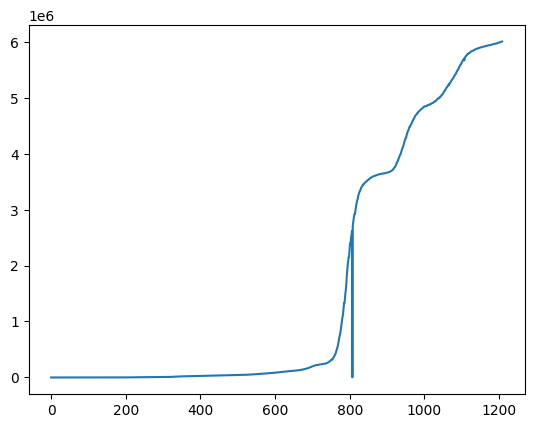

In [232]:
plt.plot(df['defCnt'])

## stdDay가 같은 데이터 추출

In [233]:
df[df.duplicated(['stdDay'], keep = False)].head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 완전히 같은 데이터 추출

In [234]:
print('모든 행이 동일한 데이터 개수 : ' + str(df.duplicated(keep = False).sum()) + '개')
df[df.duplicated(keep = False)].head(10)

모든 행이 동일한 데이터 개수 : 44개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
813,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
814,3742,2922636,서울,Seoul,20894,0,0,20894,0,30734.0,2022-04-04
862,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
863,4788,3590173,서울,Seoul,3589,0,0,3589,0,37754.0,2022-05-21
893,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
894,4868,3648259,서울,Seoul,719,0,0,717,2,38365.0,2022-06-20
960,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
961,5165,4475520,서울,Seoul,17722,0,0,17707,15,47064.0,2022-08-25
981,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14
982,5368,4723634,서울,Seoul,17384,0,0,17368,16,49673.0,2022-09-14


## 수정해야하는 데이터만 추출

In [235]:
df2 = df.drop_duplicates()
print('수정해야하는 데이터 개수 : ' + str(df2.duplicated(['stdDay'], keep = False).sum()) + '개')
df2[df2.duplicated(['stdDay'], keep = False)].head(10)

수정해야하는 데이터 개수 : 27개


,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
350,193,20138,서울,Seoul,329,11721,8224,324,5,206.89,2021-01-04
351,193,20129,서울,Seoul,329,11710,8226,325,4,206.80,2021-01-04
654,802,121843,서울,Seoul,1004,108509,11529,997,7,1260.00,2021-11-03
655,807,121843,서울,Seoul,1004,109151,11885,997,7,1260.00,2021-11-03
751,2205,320343,서울,Seoul,6888,224002,0,6873,15,3369.00,2022-02-07
752,2205,313462,서울,Seoul,6888,320343,0,6873,15,3296.00,2022-02-07
753,2205,320343,서울,Seoul,6888,320343,0,6873,15,3369.00,2022-02-07
785,2661,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
786,2693,1331263,서울,Seoul,56603,353601,0,56600,3,13999.00,2022-03-11
797,3144,2148186,서울,Seoul,65033,480318,0,65033,0,22590.00,2022-03-22


## 데이터 수정

In [236]:
df.iloc[1185:1195]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
1185,6363,5953904,서울,Seoul,2312,0,0,2306,6,63149.0,2023-03-15
1186,6364,5955883,서울,Seoul,1979,0,0,1979,0,63170.0,2023-03-16
1187,6364,5957871,서울,Seoul,1988,0,0,1987,1,63191.0,2023-03-17
1188,6365,5959761,서울,Seoul,1927,0,0,1927,0,63211.0,2023-03-18
1189,0,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-19
1190,6366,5961631,서울,Seoul,1870,0,0,1870,0,63231.0,2023-03-20
1191,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1192,6366,5962320,서울,Seoul,689,0,0,689,0,63238.0,2023-03-20
1193,6367,5965162,서울,Seoul,2842,0,0,2840,2,63268.0,2023-03-21
1194,6369,5967885,서울,Seoul,2723,0,0,2723,0,63297.0,2023-03-22


In [237]:
del_index = [350, 654, 751, 752, 785, 798, 802, 807, 836, 1038, 1066, 1107, 1174, 1190]
df_final = df2.drop(index = del_index)
df_final.reset_index(drop = True, inplace = True)
df_final.head(10)

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1,0,1,0,1,0.0,2020-01-24
5,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-25
6,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-26
7,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-27
8,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-28
9,0,1,서울,Seoul,0,0,1,0,0,0.0,2020-01-29


## 최종 확인

### 누적 확진자 수가 감소하는지 check

In [238]:
df_final[df_final['defCnt'].diff() < 0]

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay


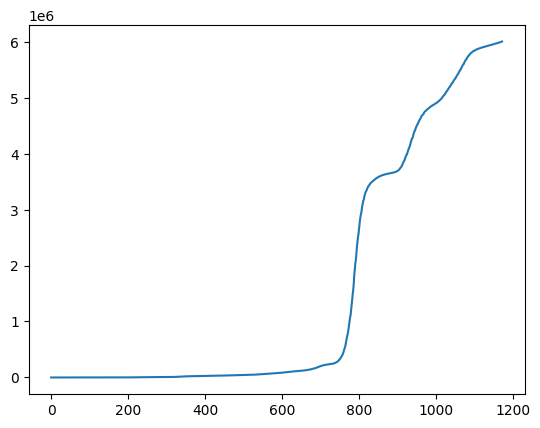

In [239]:
plt.plot(df_final['defCnt'])

## 수정 후 데이터 저장

In [240]:
cleaned_df = df_final.copy()
cleaned_df.to_csv(f'Data/CleanedData/{city}_Cleaned.csv')